--- Ridge Regression Scores ---
Train R^2: 0.7509
Test R^2:  0.6685
------------------------------
--- Lasso Regression Scores ---
Train R^2: 0.7450
Test R^2:  0.6501
------------------------------


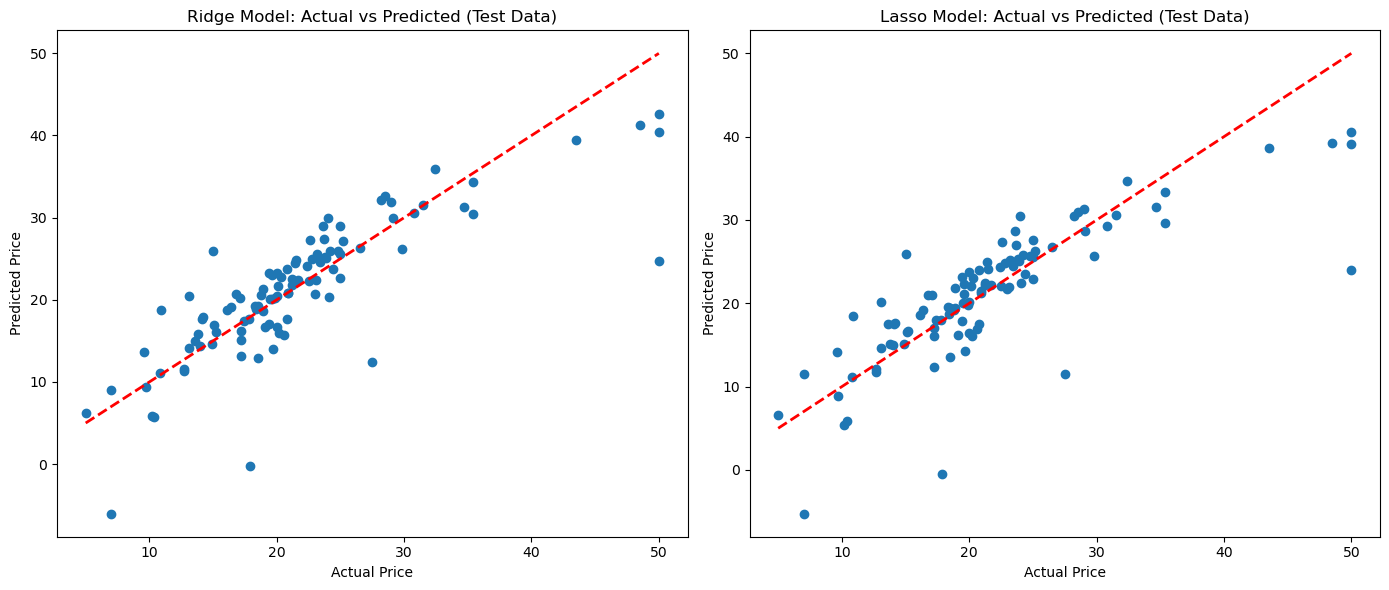

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

# --- 1. Load and Prepare Data ---
# (Assuming 'house_price_dataset' is your loaded DataFrame)
house_price_dataset=pd.read_csv("C:/Users/HP/OneDrive/Desktop/ML/projects/house price prediction/BostonHousing.csv")
# Based on your image, 'price' is the target variable
X = house_price_dataset.drop('price', axis=1)
y = house_price_dataset['price']

# --- 2. Split the Data ---
# We use the same split to compare fairly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Scale the Features (Very Important!) ---
# Regularization works best when all features are on the same scale.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Only transform test data, don't fit

# --- 4. Build and Train Regularized Models ---

# Solution A: Ridge Regression (L2)
# 'alpha' controls the strength of the penalty.
# Higher alpha = simpler model = less overfitting.
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Solution B: Lasso Regression (L1)
# Lasso can also perform feature selection.
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# --- 5. Make Predictions on Test Data ---
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# --- 6. Check the R-squared Scores ---
# We *want* the Train and Test scores to be closer together!
print("--- Ridge Regression Scores ---")
print(f"Train R^2: {r2_score(y_train, ridge_model.predict(X_train_scaled)):.4f}")
print(f"Test R^2:  {r2_score(y_test, y_pred_ridge):.4f}")
print("-" * 30)

print("--- Lasso Regression Scores ---")
print(f"Train R^2: {r2_score(y_train, lasso_model.predict(X_train_scaled)):.4f}")
print(f"Test R^2:  {r2_score(y_test, y_pred_lasso):.4f}")
print("-" * 30)

# --- 7. Plot the New Results ---
plt.figure(figsize=(14, 6))

# Ridge Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect fit line
plt.title("Ridge Model: Actual vs Predicted (Test Data)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Lasso Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect fit line
plt.title("Lasso Model: Actual vs Predicted (Test Data)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()

In [2]:
# (All your previous code goes here: imports, loading, splitting, scaling, training, plotting)
# ...
# ...
# plt.show()


# ===================================================================
# --- NEW CODE: Predict on a Single New Input ---
# ===================================================================
import numpy as np

# We'll use the Ridge model (it was slightly better)
# And we MUST use the 'scaler' we already trained

print("\n" + "="*50)
print("--- PREDICTING ON A SINGLE HOUSE ---")
print("="*50)

# --- Part 1: Example using the first house from X_test ---

# Get the first house from the test set
example_house_features = X_test.iloc[0].values
example_house_actual_price = y_test.iloc[0]

print(f"Features for the example house: \n{example_house_features}\n")

# 1. Reshape the data
# The model expects a 2D array, so we reshape (1, -1) for 1 sample, 13 features
example_house_reshaped = example_house_features.reshape(1, -1)

# 2. Scale the data (CRITICAL STEP!)
# We MUST use .transform() on the scaler we already 'fit'
example_house_scaled = scaler.transform(example_house_reshaped)

# 3. Predict!
predicted_price = ridge_model.predict(example_house_scaled)

# 4. Show the result
print("--- Example Prediction (from Test Set) ---")
print(f"   Model Predicted Price: {predicted_price[0]:.2f}")
print(f"   Actual Price:          {example_house_actual_price:.2f}")


# --- Part 2: Template for your OWN custom input ---

print("\n--- Predict on Your Custom Data ---")
# Get the feature names in order
feature_names = X.columns
print(f"Enter 13 values in this order:\n{list(feature_names)}\n")

# EXAMPLE: Create your own data
# I've put in some example values, you can change them
# [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat]
custom_data = np.array([[
    0.03,  # crim
    0.0,   # zn
    7.0,   # indus
    0,     # chas
    0.4,   # nox
    6.5,   # rm
    78.0,  # age
    4.9,   # dis
    2,     # rad
    242,   # tax
    17.0,  # ptratio
    396.0, # b
    4.0    # lstat
]])

# 1. Scale your custom data
custom_data_scaled = scaler.transform(custom_data)

# 2. Predict your custom data
custom_prediction = ridge_model.predict(custom_data_scaled)

print(f"Model Predicted Price for Your Custom Data: {custom_prediction[0]:.2f}")


--- PREDICTING ON A SINGLE HOUSE ---
Features for the example house: 
[9.1780e-02 0.0000e+00 4.0500e+00 0.0000e+00 5.1000e-01 6.4160e+00
 8.4100e+01 2.6463e+00 5.0000e+00 2.9600e+02 1.6600e+01 3.9550e+02
 9.0400e+00]

--- Example Prediction (from Test Set) ---
   Model Predicted Price: 28.97
   Actual Price:          23.60

--- Predict on Your Custom Data ---
Enter 13 values in this order:
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

Model Predicted Price for Your Custom Data: 30.13


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
import joblib

# (Assuming 'ridge_model' and 'scaler' are your trained model and scaler)
joblib.dump(ridge_model, 'ridge_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
